In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor as knr
from sklearn.model_selection import GridSearchCV
from math import sqrt
import xgboost
import pickle
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing train dataset
df_train = pd.read_csv("/content/drive/MyDrive/Black Friday/train.csv")
df_train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/Black Friday/test.csv")

In [ ]:
##Append Test and Train Data
df = df_train.append(df_test)
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
df.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [ ]:
df['Gender'] = df['Gender'].map({'F':0,'M':1})

In [ ]:
#Handle Categorical feature
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
df['Age'] = df["Age"].map({"0-17":1,"18-25":2,"26-35":3,"36-45":4,"46-50":5,"51-55":6,"55+":7})

In [ ]:
df.head(5)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
df_city = pd.get_dummies(df['City_Category'],drop_first = True)
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [ ]:
df = pd.concat([df,df_city],axis=1)

In [ ]:
df.drop("City_Category",axis=1,inplace=True)

In [ ]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [ ]:
#Replacing Null values
df['Product_Category_2'].mode()

0    8.0
dtype: float64

In [ ]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [ ]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [ ]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [ ]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace("+","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [ ]:
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int64  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  int64  
 10  C                           783667 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 71.7 MB


In [ ]:
#sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


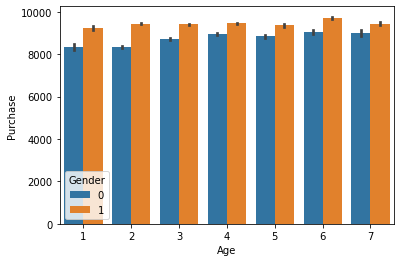

In [ ]:
#Age Vs Purchase
sns.barplot('Age','Purchase',hue="Gender",data=df)
#purchase of men is more than women
#Group 3,4,5 women are more purchasing

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


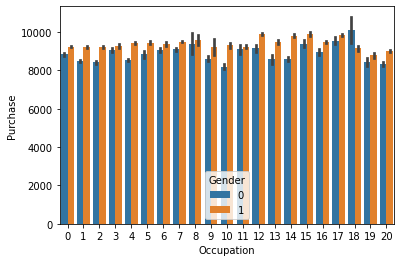

In [ ]:
sns.barplot("Occupation","Purchase",hue="Gender",data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


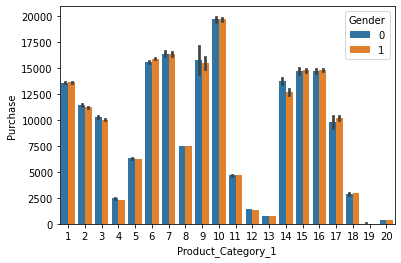

In [ ]:
sns.barplot("Product_Category_1","Purchase",hue="Gender",data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


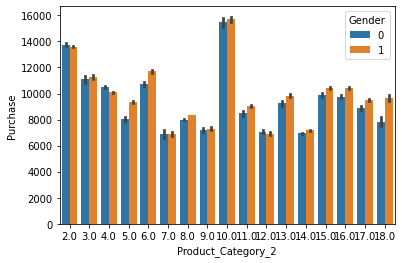

In [ ]:
sns.barplot("Product_Category_2","Purchase",hue="Gender",data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


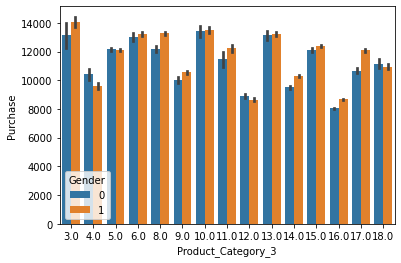

In [ ]:
sns.barplot("Product_Category_3","Purchase",hue="Gender",data=df)

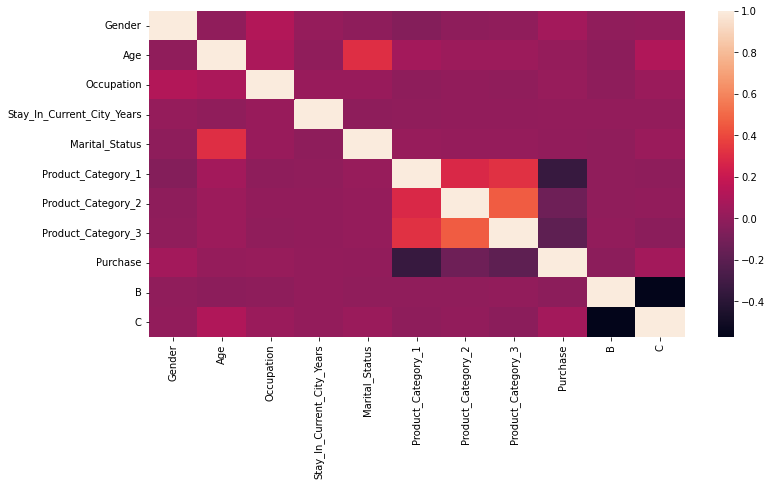

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


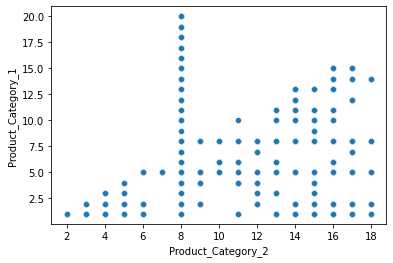

In [ ]:
sns.scatterplot('Product_Category_2','Product_Category_1',data=df)

In [ ]:
df.drop(["Age","Occupation"],axis=1,inplace=True)

In [ ]:
#Feature Scaling
df_test = df[df['Purchase'].isnull()]

In [ ]:
df_train = df[~df['Purchase'].isnull()]

In [ ]:
X = df_train.drop("Purchase",axis=1)
y = df_train["Purchase"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Linear Regression

In [ ]:
##Train your model
#Linear Regression
lr = LinearRegression()
lr_model = lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
print(metrics.r2_score(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
print(sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.487008693336332
2602.9703343377973
3595.6513479474506


## Lasso Regression

In [ ]:
ls = Lasso(alpha=1)
ls_model = ls.fit(X_train,y_train)
y_pred = ls_model.predict(X_test)

In [ ]:
print(metrics.r2_score(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))

0.12846645952561697
3578.7436596673047
21964900.86185502


## Ridge Regression

In [ ]:
rg = Ridge()
rg_model = rg.fit(X_train,y_train)
y_pred = rg_model.predict(X_test)

In [ ]:
print(metrics.r2_score(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))

0.12846871019067752
3578.658192045325
21964844.139270477


## KNN Regression

In [ ]:
err = []
for i in range(1,10):
    model = knr(i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    error = sqrt(metrics.mean_squared_error(y_test,y_pred))
    err.append(error)

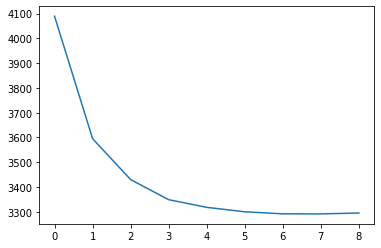

In [ ]:
plt.plot(err)

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = knr()

model = GridSearchCV(knn, params)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 8}

In [ ]:
knn = knr(n_neighbors=8)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [ ]:
error = sqrt(metrics.mean_squared_error(y_test,y_pred))
error

3295.5355344103345

## Xgboost

In [ ]:
xgr = xgboost.XGBRegressor()
xgr.fit(X_train,y_train)

[20:04:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_pred = xgr.predict(X_test)
error = sqrt(metrics.mean_squared_error(y_test,y_pred))
error

2994.1443663022733

In [ ]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.3,
                'max_depth': 5, 'alpha': 10}


In [ ]:
xgr = xgboost.XGBRegressor()
xgr.fit(X_train,y_train)

[09:46:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_pred = xgr.predict(X_test)
rmse = sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 2994.144366


## Parameter Optimization

In [ ]:
param_grid={
   
    'learning_rate':[1,0.5],
    'max_depth': [3,5,2,4],
    'n_estimators':[10,50,100,200]
    
}

In [ ]:
grid= GridSearchCV(xgboost.XGBRegressor(),param_grid, verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[12:34:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.644 total time=   1.4s
[12:34:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.644 total time=   1.4s
[12:34:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 3/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.644 total time=   1.4s
[12:34:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 4/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.642 total time=   1.4s
[12:34:19] WARNING: /workspace/src/objective/regression_obj.cu

GridSearchCV(estimator=XGBRegressor(),
             param_grid={'learning_rate': [1, 0.5], 'max_depth': [3, 5, 2, 4],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=3)

In [ ]:
grid.best_estimator_

XGBRegressor(learning_rate=0.5, max_depth=4, n_estimators=200)

In [ ]:
xgr_new_model = xgboost.XGBRegressor(learning_rate=0.5,max_depth=5,n_estimators=200)
#xgr_new_model = xgboost.XGBRegressor(learning_rate=0.5,max_depth=4,n_estimators=200)
xgr_new_model.fit(X_train,y_train)

[17:56:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.5, max_depth=5, n_estimators=200)

In [ ]:
y_pred = xgr_new_model.predict(X_test)
rmse = sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 2998.596944


In [ ]:
X_test[0]

array([ 0.57491817,  0.88881048, -0.83097552, -1.11784504, -1.69065074,
       -0.85317164,  1.490841  ])

In [ ]:
file_name = "scalar.pkl"
pickle.dump(sc, open(file_name, 'wb'))

In [ ]:
file_name = "xgboost_model.pkl"
pickle.dump(xgr_new_model,open(file_name,'wb'))